In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [4]:

df = pd.read_csv('titanic.csv')

In [6]:
print(df.shape)         # Shape of the DataFrame (rows, columns)
print(df.info())        # Column details and datatypes
print(df.describe())    # Statistical summary for numeric columns


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

In [42]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   891.000000  891.000000  891.

In [8]:
from sklearn.impute import SimpleImputer
import numpy as np

age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])


In [10]:
# 4. Fill missing Cabin with "Unknown"
df['Cabin'] = df['Cabin'].fillna('Unknown')


In [12]:
# 5. Fill missing Embarked with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


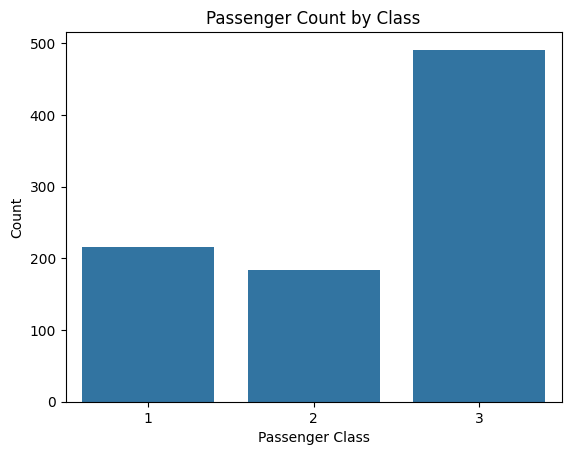

In [18]:
# 6. Analyze Passenger Class using countplot
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Count by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

In [20]:
# 7. Names of female passengers who survived
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale Survivors:\n", female_survivors['Name'])


Female Survivors:
 1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
                             ...                        
874                Abelson, Mrs. Samuel (Hannah Wizosky)
875                     Najib, Miss. Adele Kiamie "Jane"
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
887                         Graham, Miss. Margaret Edith
Name: Name, Length: 233, dtype: object


In [22]:
# 8. Passengers in 3rd class and under age 18
third_class_under_18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n3rd Class & Under 18:\n", third_class_under_18[['Name', 'Age']])



3rd Class & Under 18:
                                         Name   Age
7             Palsson, Master. Gosta Leonard   2.0
10           Sandstrom, Miss. Marguerite Rut   4.0
14      Vestrom, Miss. Hulda Amanda Adolfina  14.0
16                      Rice, Master. Eugene   2.0
22               McGowan, Miss. Anna "Annie"  15.0
..                                       ...   ...
844                      Culumovic, Mr. Jeso  17.0
850  Andersson, Master. Sigvard Harald Elias   4.0
852                  Boulos, Miss. Nourelain   9.0
869          Johnson, Master. Harold Theodor   4.0
875         Najib, Miss. Adele Kiamie "Jane"  15.0

[78 rows x 2 columns]


In [24]:
# 9. Passengers in class 1 and older than 40
class1_over_40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nClass 1 & Age > 40:\n", class1_over_40[['Name', 'Age']])



Class 1 & Age > 40:
                                                   Name   Age
6                              McCarthy, Mr. Timothy J  54.0
11                            Bonnell, Miss. Elizabeth  58.0
35                      Holverson, Mr. Alexander Oskar  42.0
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0
54                      Ostby, Mr. Engelhart Cornelius  65.0
..                                                 ...   ...
856         Wick, Mrs. George Dennick (Mary Hitchcock)  45.0
857                             Daly, Mr. Peter Denis   51.0
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  48.0
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0

[76 rows x 2 columns]


In [26]:
# 10. Among the above, who survived
class1_over_40_survived = class1_over_40[class1_over_40['Survived'] == 1]
print("\nSurvived from Class 1 & Age > 40:\n", class1_over_40_survived[['Name', 'Age']])



Survived from Class 1 & Age > 40:
                                                   Name   Age
11                            Bonnell, Miss. Elizabeth  58.0
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0
187      Romaine, Mr. Charles Hallace ("Mr C Rolmane")  45.0
194          Brown, Mrs. James Joseph (Margaret Tobin)  44.0
195                               Lurette, Miss. Elise  58.0
268      Graham, Mrs. William Thompson (Edith Junkins)  58.0
275                  Andrews, Miss. Kornelia Theodosia  63.0
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  50.0
337                    Burns, Miss. Elizabeth Margaret  41.0
366   Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  60.0
380                              Bidois, Miss. Rosalie  42.0
449                     Peuchen, Major. Arthur Godfrey  52.0
453                           Goldenberg, Mr. Samuel L  49.0
460                                Anderson, Mr. Harry  48.0
496                     Eustis, Miss. Elizabeth M

In [28]:
# 11. Male passengers who paid fare > 100
males_paid_gt_100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMales Paid > 100:\n", males_paid_gt_100[['Name', 'Fare']])


Males Paid > 100:
                                            Name      Fare
27               Fortune, Mr. Charles Alexander  263.0000
118                    Baxter, Mr. Quigg Edmond  247.5208
305              Allison, Master. Hudson Trevor  151.5500
332                   Graham, Mr. George Edward  153.4625
373                         Ringhini, Mr. Sante  135.6333
377                   Widener, Mr. Harry Elkins  211.5000
390                  Carter, Mr. William Ernest  120.0000
438                           Fortune, Mr. Mark  263.0000
505  Penasco y Castellana, Mr. Victor de Satode  108.9000
527                          Farthing, Mr. John  221.7792
544                  Douglas, Mr. Walter Donald  106.4250
550                 Thayer, Mr. John Borland Jr  110.8833
557                         Robbins, Mr. Victor  227.5250
659                  Newell, Mr. Arthur Webster  113.2750
660               Frauenthal, Dr. Henry William  133.6500
679          Cardeza, Mr. Thomas Drake Martinez  512

In [30]:
# 12. Embarked from port 'C' and in Class 2
port_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPort C & Class 2:\n", port_c_class2[['Name', 'Embarked']])



Port C & Class 2:
                                                   Name Embarked
9                  Nasser, Mrs. Nicholas (Adele Achem)        C
43            Laroche, Miss. Simonne Marie Anne Andree        C
122                               Nasser, Mr. Nicholas        C
135                                 Richard, Mr. Emile        C
181                                   Pernot, Mr. Rene        C
292                             Levy, Mr. Rene Jacques        C
308                                Abelson, Mr. Samuel        C
361                          del Carlo, Mr. Sebastiano        C
389                              Lehmann, Miss. Bertha        C
473       Jerwan, Mrs. Amin S (Marie Marthe Thuillard)        C
547                         Padro y Manent, Mr. Julian        C
608  Laroche, Mrs. Joseph (Juliette Marie Louise La...        C
685             Laroche, Mr. Joseph Philippe Lemercier        C
817                                 Mallet, Mr. Albert        C
827                 

In [32]:
# 13. Passengers with more than 2 siblings/spouses aboard
more_than_2_sibsp = df[df['SibSp'] > 2]
print("\nSibSp > 2:\n", more_than_2_sibsp[['Name', 'SibSp']])


SibSp > 2:
                                                   Name  SibSp
7                       Palsson, Master. Gosta Leonard      3
16                                Rice, Master. Eugene      4
24                       Palsson, Miss. Torborg Danira      3
27                      Fortune, Mr. Charles Alexander      3
50                          Panula, Master. Juha Niilo      4
59                  Goodwin, Master. William Frederick      5
63                               Skoog, Master. Harald      3
68                     Andersson, Miss. Erna Alexandra      4
71                          Goodwin, Miss. Lillian Amy      5
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...      3
88                          Fortune, Miss. Mabel Helen      3
119                  Andersson, Miss. Ellis Anna Maria      4
159                         Sage, Master. Thomas Henry      8
164                       Panula, Master. Eino Viljami      4
171                               Rice, Master. Arthur   

In [34]:
# 14. Did not survive and had no family aboard
no_family_did_not_survive = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nNo Family & Did Not Survive:\n", no_family_did_not_survive[['Name', 'SibSp', 'Parch']])


No Family & Did Not Survive:
                                      Name  SibSp  Parch
4                Allen, Mr. William Henry      0      0
5                        Moran, Mr. James      0      0
6                 McCarthy, Mr. Timothy J      0      0
12         Saundercock, Mr. William Henry      0      0
14   Vestrom, Miss. Hulda Amanda Adolfina      0      0
..                                    ...    ...    ...
882          Dahlberg, Miss. Gerda Ulrika      0      0
883         Banfield, Mr. Frederick James      0      0
884                Sutehall, Mr. Henry Jr      0      0
886                 Montvila, Rev. Juozas      0      0
890                   Dooley, Mr. Patrick      0      0

[374 rows x 3 columns]


In [36]:
# 15. Top 5 oldest passengers who survived
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 Oldest Survivors:\n", oldest_survivors[['Name', 'Age']])



Top 5 Oldest Survivors:
                                           Name   Age
630       Barkworth, Mr. Algernon Henry Wilson  80.0
483                     Turkula, Mrs. (Hedwig)  63.0
275          Andrews, Miss. Kornelia Theodosia  63.0
570                         Harris, Mr. George  62.0
829  Stone, Mrs. George Nelson (Martha Evelyn)  62.0


In [38]:
# 16. Passengers who paid zero fare
zero_fare_passengers = df[df['Fare'] == 0]
print("\nZero Fare Passengers:\n", zero_fare_passengers[['Name', 'Fare']])



Zero Fare Passengers:
                                  Name  Fare
179               Leonard, Mr. Lionel   0.0
263             Harrison, Mr. William   0.0
271      Tornquist, Mr. William Henry   0.0
277       Parkes, Mr. Francis "Frank"   0.0
302   Johnson, Mr. William Cahoone Jr   0.0
413    Cunningham, Mr. Alfred Fleming   0.0
466             Campbell, Mr. William   0.0
481  Frost, Mr. Anthony Wood "Archie"   0.0
597               Johnson, Mr. Alfred   0.0
633     Parr, Mr. William Henry Marsh   0.0
674        Watson, Mr. Ennis Hastings   0.0
732              Knight, Mr. Robert J   0.0
806            Andrews, Mr. Thomas Jr   0.0
815                  Fry, Mr. Richard   0.0
822   Reuchlin, Jonkheer. John George   0.0


In [40]:
# 17. Split the dataset into training and testing
# (Assuming we're doing classification on 'Survived')
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# Convert categorical to numeric
features = pd.get_dummies(features, drop_first=True)
target = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (712, 8)
Testing Set Shape: (179, 8)
